# Project to optimize 📈 Study-time 📚 of Giulietta Summer's Session ⚖️⛱

## Let's importing the Model Artifacts to implement the optimization

In [865]:
from docplex.mp.model import Model
from matplotlib import pyplot as plt
import numpy as np

In [866]:
m = Model(name='Study-time Optimization')

## Let's add some varibales 
### In this case we are going to past the number of pages that she has to study and how many days she has left

In [867]:
commercialeDue = m.continuous_var(name='Commerciale Due')
dirittoCivile = m.continuous_var(name='Diritto Civile')
proceduraCivile = m.continuous_var(name='Procedura Civile')

dayLeftCd = 12
dayLeftDc = 35
dayLeftPc = 48

commercialeDuePages = 800
dirittoCivilePages = 1200
proceduraCivilePages = 400


## Let's visualize some data 📊
### How many pages she has to study for each exam 📖

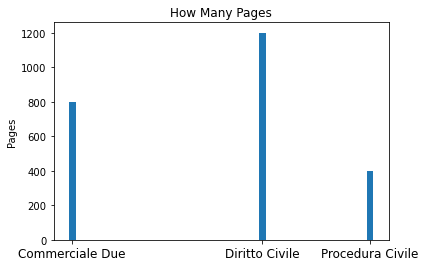

In [868]:
x =[dayLeftCd, dayLeftDc, dayLeftPc]
y = [commercialeDuePages, dirittoCivilePages, proceduraCivilePages]
plt.bar(x,y,ecolor='red')
plt.xticks(x, ['Commerciale Due','Diritto Civile','Procedura Civile'],size = 12);
plt.ylabel("Pages")
plt.title("How Many Pages");

### Different Visualization 🔍

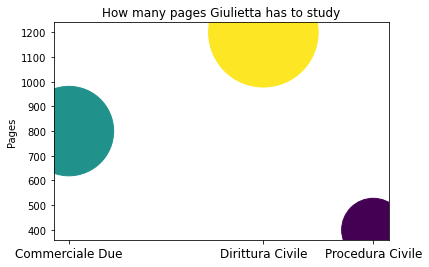

In [869]:
scale = [800,1200,400]
fig, ax = plt.subplots()

ax.scatter(x=x, y=y, c=scale, s=np.abs(scale)*10)
ax.set(title="How many pages Giulietta has to study")
plt.xticks(x, ['Commerciale Due','Dirittura Civile','Procedura Civile'], size = 12);
plt.ylabel("Pages")
plt.show()

## Adding some Constraints
### We want to constraint Giulietta to study max. each day 6 hours

In [870]:
# writing the constraints
#each exam she spend differnt time to study a page
timeSpendStudy = 6
cd_time = m.add_constraint( 0.2 * commercialeDue <= (timeSpendStudy*dayLeftCd*60)/dayLeftCd)
dc_time = m.add_constraint( 0.2 * dirittoCivile <= (timeSpendStudy*dayLeftDc*60)/dayLeftDc)
pc_time = m.add_constraint( 0.2 * proceduraCivile <= (timeSpendStudy*dayLeftPc*60)/dayLeftPc)


## Setting the Goal
### We want to see how many pages is the best to study every day of each exam

In [871]:
m.maximize(commercialeDue+dirittoCivile+proceduraCivile)

In [872]:
m.print_information()

Model: Study-time Optimization
 - number of variables: 3
   - binary=0, integer=0, continuous=3
 - number of constraints: 3
   - linear=3
 - parameters: defaults
 - objective: maximize
 - problem type is: LP


In [873]:
#how much she has to study
cd = commercialeDuePages/timeSpendStudy
dc = dirittoCivilePages/timeSpendStudy
pc = proceduraCivilePages/timeSpendStudy

In [874]:
days = np.arange(1, dayLeftPc)

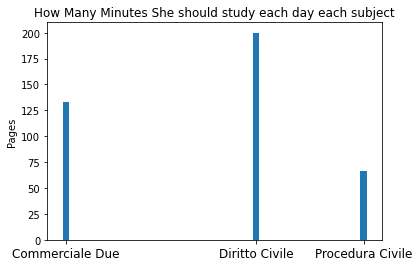

In [875]:
x =[dayLeftCd, dayLeftDc, dayLeftPc]
y = [cd, dc, pc]
plt.bar(x,y,ecolor='red')
plt.xticks(x, ['Commerciale Due','Diritto Civile','Procedura Civile'],size = 12);
plt.ylabel("Pages")
plt.title("How Many Minutes She should study each day each subject");
